In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
import pandas as pd
import numpy as np

## this is a script for merging the tables into one

## load the tables
order_train = pd.read_table('../order_train.txt')
print('size of order_train:', order_train.shape)
product_final = pd.read_table("../product.final.txt")
print('size of product.final:', product_final.shape)
user_final = pd.read_table("../user.final.txt")
print('size of user.final:', user_final.shape)
quality_final = pd.read_table("../quality.final.txt")
print('size of quality.final:', quality_final.shape)

## the first three are easy to use a left-join with the training data
joined = order_train.merge(product_final, on='product_id', how='left')
print('size of order_train left-joined with product.final:', joined.shape)
joined = joined.merge(user_final, on='user_id', how='left', 
    suffixes=('_order', '_user'))
print('size when again left-joined with user.final:', joined.shape)

## quality_final has a lot of extra rows and duplicate rows
user_ids = joined['user_id'].unique()
quality_final = quality_final.loc[quality_final['user_id'].isin(user_ids)]

## the .pivot_table() method used later does not handle NaNs, so replace
## I do this column-by-column because if I try to use fillna() on the
## whole dataframe, my computer freezes
for col in quality_final.columns:
    quality_final[col] = quality_final[col].fillna('meowmeowmeow')

## the pivot_table() method returns the counts of the duplicates
counts = quality_final.pivot_table(index=quality_final.columns.tolist(), 
    aggfunc='size')

## drop the duplicates
quality_final = quality_final.drop_duplicates()

## sort the dataframe so that it matches the 'counts' Series
quality_final = quality_final.sort_values(by=quality_final.columns.tolist())

## create new column with the counts
quality_final['counts'] = counts.values

## remove the placeholder strings and replace with NaNs again
for col in quality_final.columns:
    quality_final[col] = quality_final[col].replace(to_replace='meowmeowmeow', 
        value=np.nan)
print('size of quality.final after processing:', quality_final.shape)

joined = joined.rename(columns={'term': 'application_term'})

totaldf = joined.merge(quality_final, on=['user_id', 'bank_id', 
    'application_term'], how='left', suffixes=('_product','_quality'))

print('size of total dataframe:', totaldf.shape)
totaldf.to_csv('../all_merged_data.csv', index=False)

size of order_train: (143152, 6)
size of product.final: (48433, 33)
size of user.final: (238958, 12)


/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


size of quality.final: (1506097, 89)
size of order_train left-joined with product.final: (143152, 38)
size when again left-joined with user.final: (284819, 49)
size of quality.final after processing: (230244, 90)
size of total dataframe: (380865, 136)


In [3]:
totaldf.head()

,user_id,product_id,date_order,application_term,limit,result,city_id_product,bank_id,product_type_product,guarantee_type_product,...,medium,is_paid,quality,mobile_source,mobile_medium,mobile_is_paid,mobile_quality,standard_type_quality,guarantee_type_quality,counts
0,5d8c588ab0882d1831dc7f4896ca9461,310dcbbf4cce62f762a2aaa148d556bd,754,24,10.0,0,e4da3b7fbbce2345d7772b0674a318d5,7f1de29e6da19d22b51c68001e7e0e54,1,1,...,121.0,0.0,0.0,185.0,117.0,0.0,1.0,1.0,1.0,6.0
1,7cddcb08672e771eccaeea20500beb3f,f2217062e9a397a1dca429e7d70bc6ca,754,24,20.0,1,c81e728d9d4c2f636f067f89cc14862c,a684eceee76fc522773286a895bc8436,6,2,...,57.0,0.0,1.0,221.0,231.0,0.0,1.0,1.0,2.0,6.0
2,510d002bfdfc34a030c0b5f1eb616113,6c524f9d5d7027454a783c841250ba71,754,12,10.0,0,e4da3b7fbbce2345d7772b0674a318d5,02522a2b2726fb0a03bb19f2d8d9524d,6,1,...,123.0,0.0,0.0,151.0,231.0,0.0,1.0,1.0,1.0,12.0
3,c696280d67dfc6c17a8db98921e666f2,2de5d16682c3c35007e4e92982f1a2ba,754,24,3.0,0,45c48cce2e2d7fbdea1afc51c7c6ad26,816b112c6105b3ebd537828a39af4818,6,2,...,57.0,0.0,1.0,21.0,191.0,0.0,1.0,1.0,2.0,6.0
4,d1f600c029eb33f590899bb58cfbe985,7bcdf75ad237b8e02e301f4091fb6bc8,754,12,5.0,0,a87ff679a2f3e71d9181a67b7542122c,e96ed478dab8595a7dbda4cbcbee168f,1,2,...,121.0,0.0,1.0,51.0,94.0,0.0,1.0,1.0,2.0,6.0


In [7]:
totaldf.columns.values

array(['user_id', 'product_id', 'date_order', 'application_term', 'limit',
       'result', 'city_id_product', 'bank_id', 'product_type_product',
       'guarantee_type_product', 'loan_term_min', 'loan_term_max',
       'loan_term_type', 'decision_cycle', 'loan_cycle', 'repayment_type',
       'loan_quota_min', 'loan_quota_max', 'interest_rate_type',
       'guarantee_required', 'standard_type_product', 'apply_num',
       'fangkuan_num', 'is_p2p', 'id', 'house_register',
       'business_license', 'legal_person', 'married', 'car', 'income',
       'house', 'tax', 'socialsecurity', 'bank', 'lifecost',
       'early_repayment', 'penalty', 'pv', 'pv_index_loan',
       'pv_apply_total', 'pv_ask', 'pv_calculator', 'order_count_loan',
       'pv_daikuan', 'pv_credit', 'pv_search_daikuan',
       'pv_detail_daikuan', 'date_user', 'city_id_quality',
       'application_type', 'application_limit', 'op_type', 'col_type',
       'user_loan_experience', 'user_has_car', 'user_social_security',
  

In [9]:
# How many loan products does each bank offer?

totaldf.groupby('bank_id').agg({'product_id':'count'}).sort_values('product_id',ascending=False)






,product_id
bank_id,
cfcd208495d565ef66e7dff9f98764da,137366
8f14e45fceea167a5a36dedd4bea2543,8325
e4da3b7fbbce2345d7772b0674a318d5,8108
67c6a1e7ce56d3d6fa748ab6d9af3fd7,5460
a5771bce93e200c36f7cd9dfd0e5deaa,4939
...,...
4ca82b2a861f70cd15d83085b000dbde,1
47c00b40b245c5389dfc3100ebb4b7a0,1
e369853df766fa44e1ed0ff613f563bd,1


In [12]:
# total number of unique banks

totaldf.bank_id.unique().shape

(1596,)

In [13]:
# total number of unique loan products

totaldf.product_id.unique().shape

(12280,)

Text(0, 0.5, 'product count')

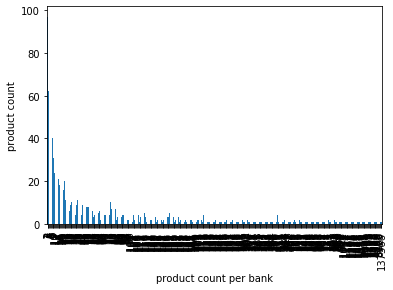

In [14]:
product_count = totaldf.groupby('bank_id')['product_id'].count().reset_index()
product_count.groupby('product_id')['bank_id'].count().plot(kind = 'bar', x = 'bank_id', y = 'product_id')
plt.xlabel('product count per bank')
plt.ylabel('product count')

In [16]:
product_count.sort_values('product_id', ascending=False)

,bank_id,product_id
1289,cfcd208495d565ef66e7dff9f98764da,137366
906,8f14e45fceea167a5a36dedd4bea2543,8325
1418,e4da3b7fbbce2345d7772b0674a318d5,8108
657,67c6a1e7ce56d3d6fa748ab6d9af3fd7,5460
1044,a5771bce93e200c36f7cd9dfd0e5deaa,4939
...,...,...
504,4ca82b2a861f70cd15d83085b000dbde,1
478,47c00b40b245c5389dfc3100ebb4b7a0,1
1410,e369853df766fa44e1ed0ff613f563bd,1
476,477b02d99dd6c00c5ba852bb9a9e1f6c,1


In [17]:
# which cities does each bank serve?

totaldf.groupby('bank_id').agg({'city_id_product':'count'}).sort_values('city_id_product',ascending=False)

,city_id_product
bank_id,
cfcd208495d565ef66e7dff9f98764da,137366
8f14e45fceea167a5a36dedd4bea2543,8325
e4da3b7fbbce2345d7772b0674a318d5,8108
67c6a1e7ce56d3d6fa748ab6d9af3fd7,5460
a5771bce93e200c36f7cd9dfd0e5deaa,4939
...,...
4ca82b2a861f70cd15d83085b000dbde,1
47c00b40b245c5389dfc3100ebb4b7a0,1
e369853df766fa44e1ed0ff613f563bd,1


In [18]:
# product types per bank?

totaldf.groupby('bank_id').agg({'product_type_product':'count'}).sort_values('product_type_product',ascending=False)

,product_type_product
bank_id,
cfcd208495d565ef66e7dff9f98764da,137366
8f14e45fceea167a5a36dedd4bea2543,8325
e4da3b7fbbce2345d7772b0674a318d5,8108
67c6a1e7ce56d3d6fa748ab6d9af3fd7,5460
a5771bce93e200c36f7cd9dfd0e5deaa,4939
...,...
4ca82b2a861f70cd15d83085b000dbde,1
47c00b40b245c5389dfc3100ebb4b7a0,1
e369853df766fa44e1ed0ff613f563bd,1


In [19]:
# exploring product data set

product_final.head()

,product_id,city_id,bank_id,product_type,guarantee_type,loan_term_min,loan_term_max,loan_term_type,decision_cycle,loan_cycle,...,married,car,income,house,tax,socialsecurity,bank,lifecost,early_repayment,penalty
0,c4ca4238a0b923820dcc509a6f75849b,c4ca4238a0b923820dcc509a6f75849b,c4ca4238a0b923820dcc509a6f75849b,6,2,6,60,2,1,2,...,0,0,1,0,0,0,0,0,1.0,1.0
1,c81e728d9d4c2f636f067f89cc14862c,c4ca4238a0b923820dcc509a6f75849b,c4ca4238a0b923820dcc509a6f75849b,4,2,12,36,2,5,10,...,0,0,0,1,1,0,0,0,1.0,1.0
2,eccbc87e4b5ce2fe28308fd9f2a7baf3,c4ca4238a0b923820dcc509a6f75849b,c81e728d9d4c2f636f067f89cc14862c,6,2,1,60,1,2,3,...,0,0,1,0,0,0,1,1,NaN,NaN
3,a87ff679a2f3e71d9181a67b7542122c,c4ca4238a0b923820dcc509a6f75849b,c81e728d9d4c2f636f067f89cc14862c,6,2,6,36,2,2,3,...,0,0,0,0,0,0,1,1,1.0,1.0
4,e4da3b7fbbce2345d7772b0674a318d5,c4ca4238a0b923820dcc509a6f75849b,c81e728d9d4c2f636f067f89cc14862c,6,2,6,24,2,2,4,...,0,0,0,1,0,1,1,0,1.0,1.0


In [24]:
product_final.shape

(48433, 33)

In [23]:
product_final.columns.values

array(['product_id', 'city_id', 'bank_id', 'product_type',
       'guarantee_type', 'loan_term_min', 'loan_term_max',
       'loan_term_type', 'decision_cycle', 'loan_cycle', 'repayment_type',
       'loan_quota_min', 'loan_quota_max', 'interest_rate_type',
       'guarantee_required', 'standard_type', 'apply_num', 'fangkuan_num',
       'is_p2p', 'id', 'house_register', 'business_license',
       'legal_person', 'married', 'car', 'income', 'house', 'tax',
       'socialsecurity', 'bank', 'lifecost', 'early_repayment', 'penalty'],
      dtype=object)

In [20]:
# How many unique products in product data set?

product_final.product_id.unique().shape

# notice this is fewer than the number of unique products in the final merged data set

(48433,)

In [21]:
# How many unique bank ids are in the product data set? notice this is fewer than the number of banks 
# in the final merged data set

product_final.bank_id.unique().shape

(2571,)

In [22]:
# how many unique cities are in the product data set?

product_final.city_id.unique().shape

(106,)

In [ ]:
categorical = ["CentralAir", "Electrical", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", 
               "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "Functional", 
              "Fireplaces", "FireplaceQu", "GarageType", "GarageFinish"]
for feature in categorical:
    print(df2[feature].value_counts())
    print('')

In [ ]:
array(['product_id', 'city_id', 'bank_id', 'product_type',
       'guarantee_type', 'loan_term_min', 'loan_term_max',
       'loan_term_type', 'decision_cycle', 'loan_cycle', 'repayment_type',
       'loan_quota_min', 'loan_quota_max', 'interest_rate_type',
       'guarantee_required', 'standard_type', 'apply_num', 'fangkuan_num',
       'is_p2p', 'id', 'house_register', 'business_license',
       'legal_person', 'married', 'car', 'income', 'house', 'tax',
       'socialsecurity', 'bank', 'lifecost', 'early_repayment', 'penalty'],
      dtype=object)

In [26]:
categorical = ['product_id', 'city_id', 'bank_id','product_type',
       'guarantee_type', 'loan_term_min', 'loan_term_max',
       'loan_term_type', 'decision_cycle', 'loan_cycle', 'repayment_type',
       'loan_quota_min', 'loan_quota_max', 'interest_rate_type',
       'guarantee_required', 'standard_type', 'apply_num', 'fangkuan_num',
       'is_p2p', 'id', 'house_register', 'business_license',
       'legal_person', 'married', 'car', 'income', 'house', 'tax',
       'socialsecurity', 'bank', 'lifecost', 'early_repayment', 'penalty']

for feature in categorical:
    print (product_final[feature].value_counts())
    print('')

c5f43b7aa4696fce82565cbcf4a00128    1
e3b9c85801d62b070b775c39c4266a08    1
91f83df8ac340fec40e38a5abb315cc5    1
b1e25df882aba7f3296e2a9d48821151    1
8fc21f7b16f9d55cb3220ad51f9f81f5    1
                                   ..
808219e701ff34a20cdd1a3d215e266a    1
60963a8ed3c5282e57e73d6c505cd872    1
8fcb0356928f1fe92114524797c585a3    1
b49cde3804780d21cb0a4f4008e53ff1    1
84358c19ae342751d07e10b852dd9c53    1
Name: product_id, Length: 48433, dtype: int64

c81e728d9d4c2f636f067f89cc14862c    4575
c4ca4238a0b923820dcc509a6f75849b    3981
a87ff679a2f3e71d9181a67b7542122c    3945
45c48cce2e2d7fbdea1afc51c7c6ad26    2402
4e732ced3463d06de0ca9a15b6153677    2395
                                    ... 
7f6ffaa6bb0b408017b62254211691b5       1
950a4152c2b4aa3ad78bdd6b366cc179       1
8f121ce07d74717e0b1f21d122e04521       1
c8ffe9a587b126f152ed3d89a146b445       1
c058f544c737782deacefa532d9add4c       1
Name: city_id, Length: 106, dtype: int64

cfcd208495d565ef66e7dff9f98764da    39139


In [ ]:
user_count = ratings.groupby('userID')['placeID'].count().reset_index()
user_count.groupby('placeID')['userID'].count().plot(kind='bar', x='placeID', y='userID')
plt.xlabel('review count/user')
plt.ylabel('user count')

In [ ]:
product_count = prouct_final.groupby('userID')['placeID'].count().reset_index()
user_count.groupby('placeID')['userID'].count().plot(kind='bar', x='placeID', y='userID')
plt.xlabel('review count/user')
plt.ylabel('user count')